In [235]:
from __future__ import division 
from illustris import getGalaxy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [236]:
# Getting data from a particular galaxy (from online)

# Here we pick which kinds of particles we want (0-gas, 4-stars)
# and what information about them 
# (see http://www.illustris-project.org/data/docs/specifications/)
fields=[
    [4,'Coordinates'],
    [4,'Velocities'],
    [4,'Masses']
    #[0,'Coordinates']
    #[0,'Volume']
]
# Here we actually pull the data from online
data=getGalaxy(342260,fields)


# And here we put it into simple numpy arrays to work with
rStar=data[0][:,:]
vStar=data[1][:,:]
mStar=data[2][:]
#rGas=data[3][:,:]
#volGas=data[3][:]

In [237]:
# A few useful functions to build from

# given the position and masses of the stars finds their center of mass
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

# given the position and masses of the stars, some number of pixels and some distance finds
# the projected total mass
def findPixels(rStar,mStar,nPixels,span):
    pixels=np.zeros((nPixels,nPixels))
    for i in range(nPixels):
        for j in range(nPixels):
            inPix=np.argwhere((span*(((2*i)/nPixels)-1)<rStar[:,0])
                            &(span*(((2*j)/nPixels)-1)<rStar[:,1])
                         &(span*(((2*(i+1))/nPixels)-1)>rStar[:,0])
                         &(span*(((2*(j+1))/nPixels)-1)>rStar[:,1]))
            if inPix.size==0:
                continue
            pixels[i,j]=np.sum(mStar[inPix])
    return pixels

In [238]:
# Moving all the co-ordinates such that the galaxy's centered on (0,0,0)

nStar=len(mStar)
com=findCenterMass(rStar,mStar) # finds the center of mass
rStar=rStar-com # recenters all positions around the center of mass

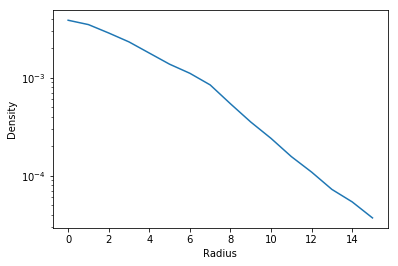

In [239]:
# Finding and plotting the density profile

# finds the distance between every particle and the origin
rSquared=np.zeros(nStar)
for i in range(3):
    rSquared+=rStar[:,i]**2
r=np.sqrt(rSquared) 

# finds all particles in each of a series of radial bins,
# finds the total mass in that bin and divides by the volume
nBins=16
rMax=16
rBins=np.linspace(0,rMax,nBins+1)
density=np.zeros(nBins)
for i in range(nBins):
    inBin=np.argwhere((r>rBins[i]) & (r<rBins[i+1]))
    if inBin.size==0:
        continue
    density[i]=np.sum(mStar[inBin])/(4*np.pi*(np.power(rBins[i+1],3) - np.power(rBins[i],3))/3)

# plots the denisty
densPlot=plt.gca()
densPlot.semilogy(rBins[:-1],density)
densPlot.set_ylabel('Density')
densPlot.set_xlabel('Radius')
plt.show(densPlot)

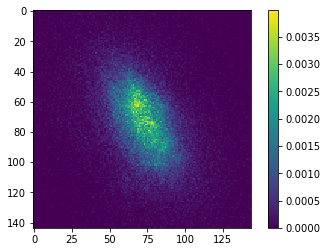

In [240]:
# Making a simple image of the galaxy

pixels=findPixels(rStar,mStar,144,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)

In [241]:
fields=[
        [0, 'Volume'],
        [0, 'Masses'],
        [0,'Coordinates']
]    
spiral1=getGalaxy(15,fields)
vGas1=spiral1[0][:]
mGas1=spiral1[1][:]
rGas1=spiral1[2][:,:]

In [242]:
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

In [243]:
nStar=len(mStar)
rStar=rGas1-com # recenters

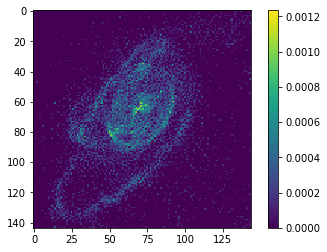

In [244]:
cm=findCenterMass(rGas1,mGas1)
rGas1=rGas1-cm
pixels=findPixels(rGas1,mGas1,144,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)


In [245]:
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

In [246]:
 fields=[
        [0, 'Volume'],
        [0, 'Masses'],
        [0,'Coordinates']
]    
spiral2=getGalaxy(300122,fields)
vGas2=spiral2[0][:]
mGas2=spiral2[1][:]
rGas2=spiral2[2][:,:]

In [247]:
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

In [248]:
nStar=len(mStar)
rStar=rGas2-com # recenters

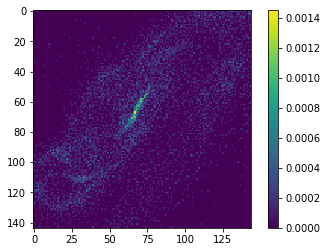

In [249]:
cm=findCenterMass(rGas2,mGas2)
rGas2=rGas2-cm
pixels=findPixels(rGas2,mGas2,144,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)

In [250]:
 fields=[
        [0, 'Volume'],
        [0, 'Masses'],
        [0,'Coordinates']
]    
ellipticals2=getGalaxy(342260,fields)
vGas3=ellipticals2[0][:]
mGas3=ellipticals2[1][:]
rGas3=ellipticals2[2][:,:]

In [251]:
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

In [252]:
nStar=len(mStar)
rStar=rGas3-com # recenters

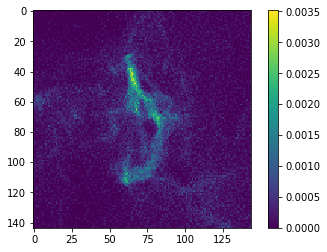

In [253]:
cm=findCenterMass(rGas3,mGas3)
rGas3=rGas3-cm
pixels=findPixels(rGas3,mGas3,144,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)

In [254]:
fields=[
        [0, 'Volume'],
        [0, 'Masses'],
        [0,'Coordinates']
]    
ellipticals2=getGalaxy(382533,fields)
vGas4=ellipticals2[0][:]
mGas4=ellipticals2[1][:]
rGas4=ellipticals2[2][:,:]

In [255]:
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

In [256]:
def findPixels(rStar,mStar,nPixels,span):
    pixels=np.zeros((nPixels,nPixels))
    for i in range(nPixels):
        for j in range(nPixels):
            inPix=np.argwhere((span*(((2*i)/nPixels)-1)<rStar[:,0])
                            &(span*(((2*j)/nPixels)-1)<rStar[:,1])
                         &(span*(((2*(i+1))/nPixels)-1)>rStar[:,0])
                         &(span*(((2*(j+1))/nPixels)-1)>rStar[:,1]))
            if inPix.size==0:
                continue
            pixels[i,j]=np.sum(mStar[inPix])
    return pixels

In [257]:
nStar=len(mStar)
rStar=rGas3-com # recenters

In [258]:
'''
cm=findCenterMass(rGas4,mGas4)
rGas4=rGas4-cm
pixels=findPixels(rGas4,mGas4,32,9)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)


pixels=findPixels(rGas4,mGas4,144,9)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)

pixels=findPixels(rGas4,mGas4,144,8)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)


'''

'\ncm=findCenterMass(rGas4,mGas4)\nrGas4=rGas4-cm\npixels=findPixels(rGas4,mGas4,32,9)\ngalaxyPlot=plt.gca()\nimage=galaxyPlot.imshow(pixels)\nplt.colorbar(image)\nplt.show(galaxyPlot)\n\n\npixels=findPixels(rGas4,mGas4,144,9)\ngalaxyPlot=plt.gca()\nimage=galaxyPlot.imshow(pixels)\nplt.colorbar(image)\nplt.show(galaxyPlot)\n\npixels=findPixels(rGas4,mGas4,144,8)\ngalaxyPlot=plt.gca()\nimage=galaxyPlot.imshow(pixels)\nplt.colorbar(image)\nplt.show(galaxyPlot)\n\n\n'

In [259]:
galaxies1= np.sum(mGas1)
galaxies2= np.sum(mGas2)
galaxies3= np.sum(mGas3)
galaxies4= np.sum(mGas4)
print 'spiral1:', galaxies1
print 'spiral2:', galaxies2
print 'ellipticals1:', galaxies3
print 'ellipticals2:', galaxies4

spiral1: 1.43345
spiral2: 1.25028
ellipticals1: 7.32708
ellipticals2: 4.97721


In [260]:
print(np.mean(rStar))
mask=np.argwhere((rStar[:,0]<9) & (rStar[:,1]>-9) & (rStar[:,1]<9) & (rStar[:,0]>-9)) 
totalmass1=np.sum(mGas1[mask])
print 'withmath',totalmass1

print mask

-35933.3128151
withmath 0.0
[]


In [261]:
print   'total',np.sum(vGas1)         
galaxiesb= np.sum(vGas2)
galaxiesc= np.sum(vGas3)
galaxiesd= np.sum(vGas4)
print'spirals1:',galaxiesa
print'spirals2:',galaxiesb
print'ellipticals1:',galaxiesc
print 'ellipticals2:',galaxiesd

total 43312.3
spirals1: 43312.3
spirals2: 147301.0
ellipticals1: 361565.0
ellipticals2: 578158.0


In [262]:
fields=[
        [4, 'Velocities'],
        [4, 'Masses'],
        [4,'Coordinates']
] 
gStellar1=getGalaxy(15,fields)
vStellar1=gStellar1[0][:,:]
mStellar1=gStellar1[1][:]
rStellar1=gStellar1[2][:,:]

In [263]:
fields=[
        [4, 'Velocities'],
        [4, 'Masses'],
        [4,'Coordinates']
] 
gStellar2=getGalaxy(300122,fields)
vStellar2=gStellar2[0][:]
mStellar2=gStellar2[1][:]
rStellar2=gStellar2[2][:,:]

In [264]:
fields=[
        [4, 'Velocities'],
        [4, 'Masses'],
        [4,'Coordinates']
] 
gStellar3=getGalaxy(342260,fields)
vStellar3=gStellar3[0][:]
mStellar3=gStellar3[1][:]
rStellar3=gStellar3[2][:,:]

In [265]:
fields=[
        [4, 'Velocities'],
        [4, 'Masses'],
        [4,'Coordinates']
] 
gStellar2=getGalaxy(382533,fields)
vStellar4=gStellar2[0][:]
mStellar4=gStellar2[1][:]
rStellar4=gStellar2[2][:,:]

In [267]:
gStellar1= np.sum(mStellar1)
gStellar2= np.sum(mStellar2)
gStellar3= np.sum(mStellar3)
gStellar4= np.sum(mStellar4)

print 'spiral1:', gStellar1
print 'spiral2:', gStellar2
print 'ellipticals1:', gStellar3
print 'ellipticals2:', gStellar4

spiral1: 13.183
spiral2: 2.78618
ellipticals1: 5.64658
ellipticals2: 4.00739


In [268]:
galaxies1= np.sum(mGas1)
galaxies2= np.sum(mGas2)
galaxies3= np.sum(mGas3)
galaxies4= np.sum(mGas4)
print 'spiral1:', galaxies1
print 'spiral2:', galaxies2
print 'ellipticals1:', galaxies3
print 'ellipticals2:', galaxies4

spiral1: 1.43345
spiral2: 1.25028
ellipticals1: 7.32708
ellipticals2: 4.97721


In [272]:
 fields=[
        [0, 'Volume'],
        [0, 'Masses'],
        [0,'Coordinates']
]    
a=getGalaxy(177131,fields)
vGas5=a[0][:]
mGas5=a[1][:]
rGas5=a[2][:,:]

In [273]:
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

In [274]:
nStar=len(mStar)
rStar=rGas5-com # recenters

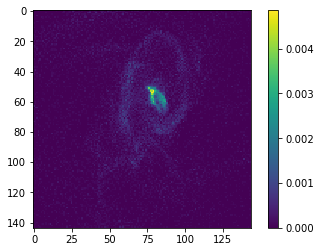

In [275]:
cm=findCenterMass(rGas5,mGas5)
rGas5=rGas5-cm
pixels=findPixels(rGas5,mGas5,144,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)

In [277]:
 fields=[
        [0, 'Volume'],
        [0, 'Masses'],
        [0,'Coordinates']
]    
b=getGalaxy(200655,fields)
vGas6=b[0][:]
mGas6=b[1][:]
rGas6=b[2][:,:]

In [278]:
def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

In [279]:
nStar=len(mStar)
rStar=rGas6-com # recenters

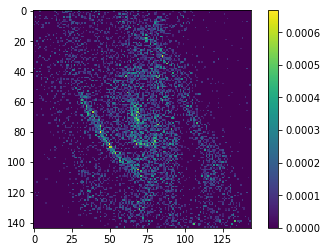

In [280]:
cm=findCenterMass(rGas6,mGas6)
rGas6=rGas6-cm
pixels=findPixels(rGas6,mGas6,144,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)

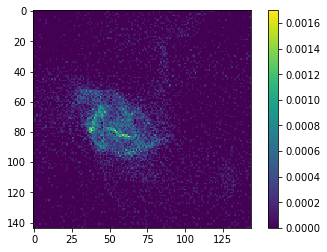

In [281]:
 fields=[
        [0, 'Volume'],
        [0, 'Masses'],
        [0,'Coordinates']
]    
c=getGalaxy(204394,fields)
vGas7=c[0][:]
mGas7=c[1][:]
rGas7=c[2][:,:]

def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

nStar=len(mStar)

rStar=rGas7-com # recenters
cm=findCenterMass(rGas7,mGas7)
rGas7=rGas7-cm
pixels=findPixels(rGas7,mGas7,144,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)

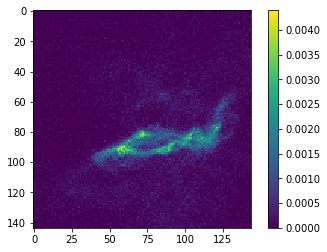

In [283]:
 fields=[
        [0, 'Volume'],
        [0, 'Masses'],
        [0,'Coordinates']
]    
d=getGalaxy(268841,fields)
vGas8=d[0][:]
mGas8=d[1][:]
rGas8=d[2][:,:]

def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

nStar=len(mStar)

rStar=rGas8-com # recenters
cm=findCenterMass(rGas8,mGas8)
rGas8=rGas8-cm
pixels=findPixels(rGas8,mGas8,144,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)

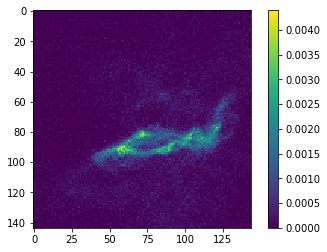

In [284]:
 fields=[
        [0, 'Volume'],
        [0, 'Masses'],
        [0,'Coordinates']
]    
e=getGalaxy(268841,fields)
vGas9=e[0][:]
mGas9=e[1][:]
rGas9=e[2][:,:]

def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

nStar=len(mStar)

rStar=rGas9-com # recenters
cm=findCenterMass(rGas9,mGas9)
rGas9=rGas9-cm
pixels=findPixels(rGas9,mGas9,144,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)

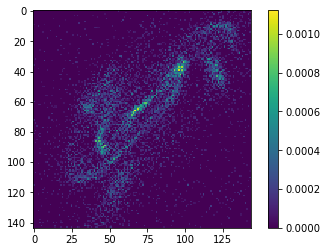

In [288]:
 fields=[
        [0, 'Volume'],
        [0, 'Masses'],
        [0,'Coordinates']
]    
f=getGalaxy(278699,fields)
vGas10=f[0][:]
mGas10=f[1][:]
rGas10=f[2][:,:]

def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

nStar=len(mStar)

rStar=rGas10-com # recenters
cm=findCenterMass(rGas10,mGas10)
rGas10=rGas10-cm
pixels=findPixels(rGas10,mGas10,144,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)

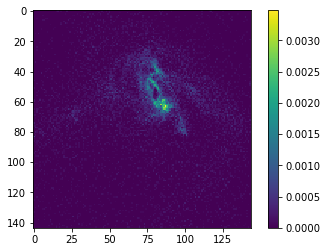

In [287]:
 fields=[
        [0, 'Volume'],
        [0, 'Masses'],
        [0,'Coordinates']
]    
g=getGalaxy(311141,fields)
vGas11=g[0][:]
mGas11=g[1][:]
rGas11=g[2][:,:]

def findCenterMass(rStar,mStar):
    com=np.zeros(3)
    for i in range(3):
        com[i]=np.sum(rStar[:,i]*mStar[:])/np.sum(mStar[:])
    return com

nStar=len(mStar)

rStar=rGas11-com # recenters
cm=findCenterMass(rGas11,mGas11)
rGas11=rGas11-cm
pixels=findPixels(rGas11,mGas11,144,16)
galaxyPlot=plt.gca()
image=galaxyPlot.imshow(pixels)
plt.colorbar(image)
plt.show(galaxyPlot)

In [289]:
a= np.sum(mGas5)
b= np.sum(mGas6)
c= np.sum(mGas7)
d= np.sum(mGas8)
e= np.sum(mGas9)
f= np.sum(mGas10)
g= np.sum(mGas11)
print a
print b
print c
print d
print e
print f
print g

3.66665
1.26763
5.27371
5.27371
5.27371
1.16763
1.92054
